## mnist using cnn

In [2]:
import matplotlib.pyplot as plt

In [6]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import utils

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


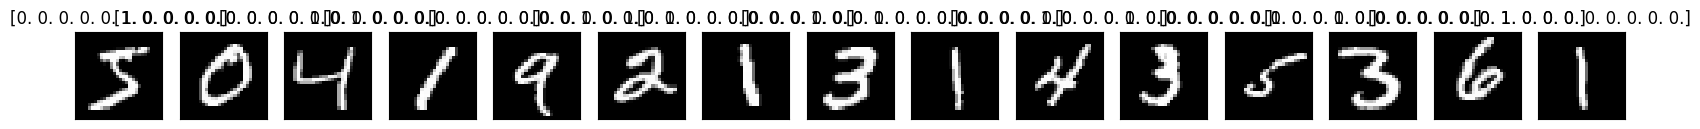

In [61]:
fig,axes=plt.subplots(ncols=15,figsize=(20,8),sharex=True,sharey=False)
for i in range(15):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

In [22]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
y_train.shape

(60000, 10)

In [25]:
model=Sequential()

In [27]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


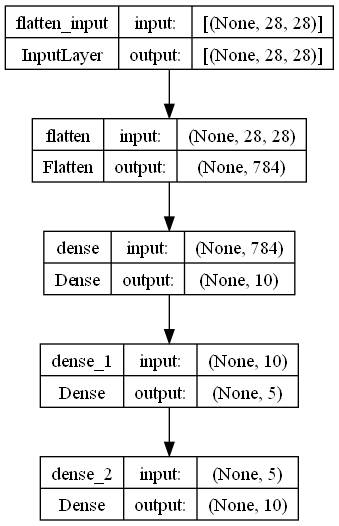

In [30]:
utils.plot_model(model,show_shapes=True)

In [38]:
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

In [39]:
new=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),verbose=1)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7560 - acc: 0.4295 - val_loss: 1.3481 - val_acc: 0.5940
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2206 - acc: 0.6212 - val_loss: 1.0920 - val_acc: 0.6695
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0199 - acc: 0.6711 - val_loss: 0.9612 - val_acc: 0.6871
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9429 - acc: 0.6888 - val_loss: 0.8912 - val_acc: 0.7171
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8512 - acc: 0.7361 - val_loss: 0.8304 - val_acc: 0.7435
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8068 - acc: 0.7492 - val_loss: 0.8172 - val_acc: 0.7505
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7874 - acc: 0.7552 - val_loss: 0.7633 - val_acc: 0.7608
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

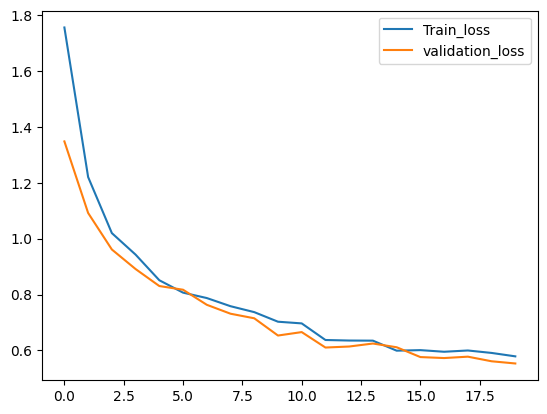

In [40]:
plt.plot(new.history['loss'],label='Train_loss')
plt.plot(new.history['val_loss'],label='validation_loss')
plt.legend()

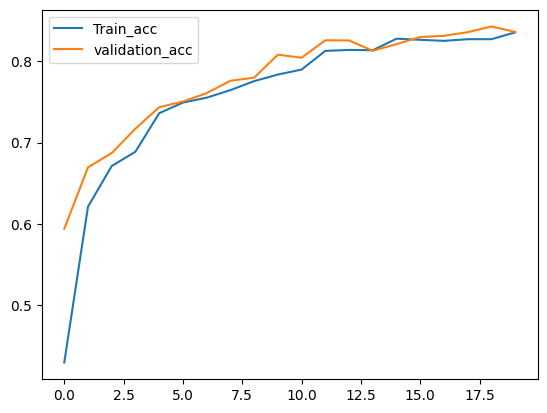

In [42]:
plt.plot(new.history['acc'],label='Train_acc')
plt.plot(new.history['val_acc'],label='validation_acc')
plt.legend()

In [43]:
import keras

In [44]:
model.save('new1.h5')

C:\Users\lager\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
m=keras.models.load_model("new1.h5")

In [50]:
import numpy as np

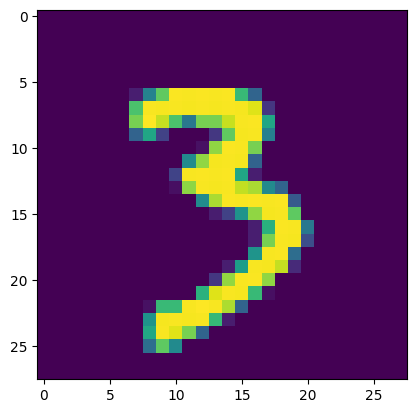

In [66]:
plt.imshow(x_test[30])

In [67]:
x=np.reshape(x_test[30],(1,28,28))

In [68]:
np.argmax(m.predict(x))

1/1 [==============================] - 0s 28ms/step


7